<a href="https://colab.research.google.com/github/Junseokee/-Python/blob/main/220830_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Skin Cancer MNIST

## 파일 업로드

In [188]:
# 기본 라이브러리 import
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [189]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [4]:
# 데이터 다운로드 하는 명령
import zipfile
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip '*.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_

### 파일당 데이터 갯수 확인

In [59]:
# 베이스 디렉토리 설정
base_dir = '/content/'
train_dir1 = os.path.join(base_dir, 'HAM10000_images_part_1')
train_dir2 = os.path.join(base_dir, 'HAM10000_images_part_2')
train_dir3 = os.path.join(base_dir, 'ham10000_images_part_1')
train_dir4 = os.path.join(base_dir, 'ham10000_images_part_2')

In [60]:
train_fnames1 = os.listdir(train_dir1)
train_fnames2 = os.listdir(train_dir2)
train_fnames3 = os.listdir(train_dir3)
train_fnames4 = os.listdir(train_dir4)

In [61]:
# 파일별 이미지 갯수
print(len(train_fnames1))
print(len(train_fnames2))
print(len(train_fnames3))
print(len(train_fnames4))

5000
5015
5000
5015


In [62]:
# 데이터 프레임 확인
df = pd.read_csv('/content/HAM10000_metadata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [63]:
# 결측치 확인
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [65]:
df['dx'].value_counts() # 라벨값 수치 확인

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Text(0.5, 1.0, 'Class Count')

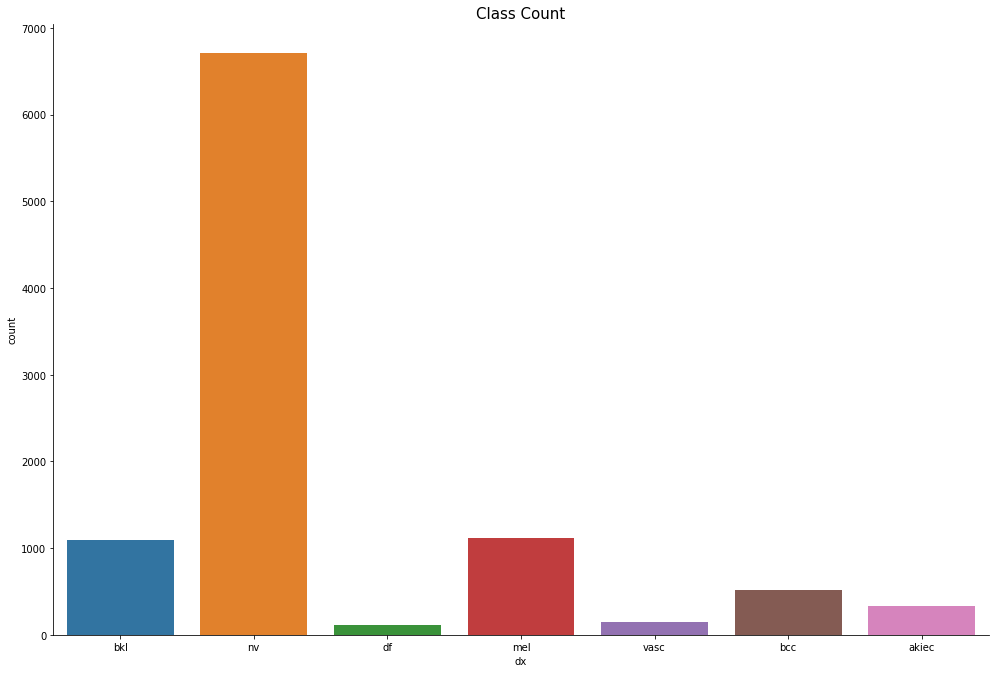

In [66]:
# 라벨값 수치 시각화 nv가 많은 비율을 차지함
a = sns.catplot(data=df, x='dx',kind='count')
a.fig.set_size_inches(16,10)
a.ax.set_title('Class Count', fontsize= 15)

## 데이터와 라벨 분리

In [67]:
# RGB 파일 업로드
data_dir = '/content/hmnist_28_28_RGB.csv'
rgbdf = pd.read_csv(data_dir)

In [190]:
rgbdf.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [83]:
#데이터와 라벨값과 분리 RGB파일은 픽셀값과 라벨값이 저장된 데이터

x = rgbdf.drop(columns=['label'], axis=1)
y = rgbdf['label']
x = x.to_numpy()
x = x.reshape(-1,28,28,3)

In [ ]:
xx = rgbdf.drop(columns=['label'], axis=1)
y = rgbdf['label']
xx = xx.to_numpy()
xx.reshape(-1,28,28,3)

In [ ]:
# # 이미지 리사이징 --> 실패
# import os
# import glob
# from PIL import Image

# files = glob.glob('/content/ham10000_images_part_1/*.jpg')

# for f in files:
#     img = Image.open(f)
#     img_resize = img.resize(244, 244)
#     title, ext = os.path.splitext(f)
#     img_resize.save(title + ext)

In [ ]:
# x 리사이징, y 카테고리화
from tensorflow.keras.utils import to_categorical

x = x/255
y=to_categorical(y)

In [84]:
# 사이즈 확인
print(x.shape,"\n",y.shape)

(10015, 28, 28, 3) 
 (10015, 7)


In [85]:
# 라벨값
label={
    ' Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Melanoma':6,
    'Vascular lesions':5
}

[0. 0. 1. 0. 0. 0. 0.]


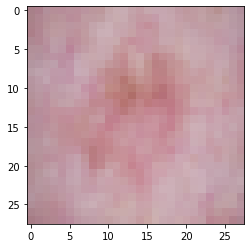

In [ ]:
# 이미지 샘플
plt.imshow(x[500])
print(y[500])

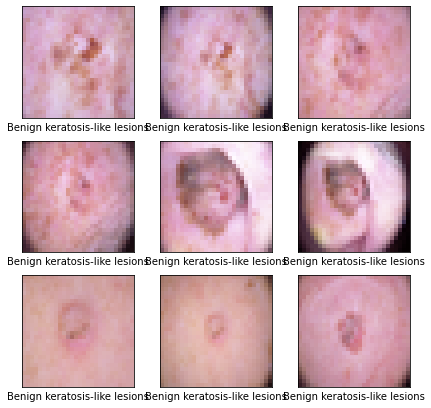

In [ ]:
# 이미지 샘플 시각화

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(234)

class_names = [' Actinic keratoses','Basal cell carcinoma',
    'Benign keratosis-like lesions','Dermatofibroma',
    'Melanocytic nevi','Melanoma','Vascular lesions']
sample_size = 9
random_idx = np.random.randint(10000, size=sample_size)
plt.figure(figsize = (7,7))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel(class_names[int(y[i])])
plt.show()

In [88]:
# Train Test 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, random_state=333)

In [89]:
print(f'x_train.shape: {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape: (8012, 28, 28, 3), x_test.shape : (2003, 28, 28, 3)
y_train.shape: (8012, 7), y_test.shape : (2003, 7)


In [90]:
# 데이터 증식
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
train_datagen.fit(x_train)

In [132]:
# 모델 정의

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (28, 28, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 1024, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 256)       73984     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 7, 512)        

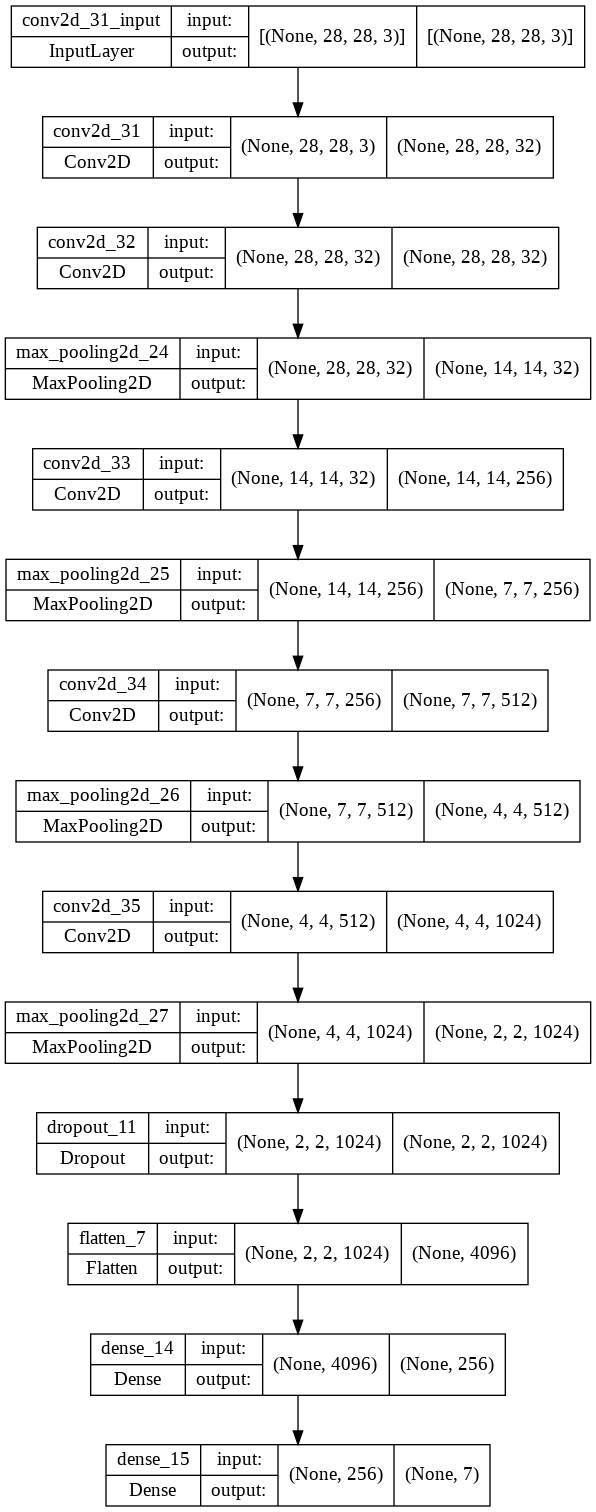

In [133]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)

In [134]:
# 콜백 정의

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', patience=7,verbose=1)
mc = ModelCheckpoint('best_mask_model.h5',
                     monitor='val_acc',
                     verbose=2, save_best_only = True)

In [135]:
# 모델 학습

history = model.fit(x_train,y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[es,mc])

Epoch 1/100
124/126 [============================>.] - ETA: 0s - loss: 1.1217 - acc: 0.6700
Epoch 1: val_acc improved from -inf to 0.66101, saving model to best_mask_model.h5
126/126 [==============================] - 3s 19ms/step - loss: 1.1206 - acc: 0.6696 - val_loss: 1.0444 - val_acc: 0.6610
Epoch 2/100
125/126 [============================>.] - ETA: 0s - loss: 0.9662 - acc: 0.6739
Epoch 2: val_acc improved from 0.66101 to 0.66151, saving model to best_mask_model.h5
126/126 [==============================] - 2s 17ms/step - loss: 0.9665 - acc: 0.6737 - val_loss: 0.9462 - val_acc: 0.6615
Epoch 3/100
125/126 [============================>.] - ETA: 0s - loss: 0.8927 - acc: 0.6860
Epoch 3: val_acc improved from 0.66151 to 0.68647, saving model to best_mask_model.h5
126/126 [==============================] - 2s 17ms/step - loss: 0.8930 - acc: 0.6860 - val_loss: 0.8732 - val_acc: 0.6865
Epoch 4/100
125/126 [============================>.] - ETA: 0s - loss: 0.8491 - acc: 0.6941
Epoch 4: va

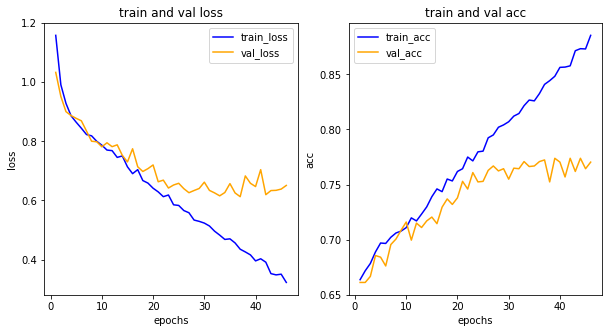

In [130]:
# 학습결과 시각화

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

## 전이학습

In [136]:
# Train Test 데이터셋 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, random_state=333)

In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

In [153]:
import tensorflow as tf

In [155]:
import tensorflow.keras.applications

In [174]:
# 전이학습 모델 설치
pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 583.4 MB 9.9 kB/s 
     |████████████████████████████████| 1.7 MB 36.0 MB/s 
     |████████████████████████████████| 5.9 MB 36.3 MB/s 
     |████████████████████████████████| 439 kB 52.2 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [175]:
# 모델 옵션 값

import tensorflow.keras.applications.convnext
Xcep =  tf.keras.applications.convnext.ConvNeXtTiny(
    model_name='convnext_tiny',
    include_top=True,
    include_preprocessing=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

114745344/114735104 [==============================] - 1s 0us/step


In [176]:
Xcep.summary()

Model: "convnext_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_tiny_prestem_normaliz  (None, 224, 224, 3)  0          ['input_6[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_tiny_stem (Sequential  (None, 56, 56, 96)  4896        ['convnext_tiny_prestem_normaliza
 )                                                               tion[0][0]']         

In [ ]:
# 20개 정도 모델을 사용해봤지만, 사이즈 (28,28)을 지원하는 모델이 없음

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

model = Sequential()
model.add(Xcep)
# 분류기 직접 정의
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7, activation = 'softmax'))

# model.summary() # 모델 구조 확인

model.compile(optimizer = Adam(1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train,y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[es,mc])